In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

plt.style.use(["science","bright","grid"])

### N_E = 8 unbiased

In [50]:
N_E         = 8
V_INPUT_MAX = 0.04
L_VALS      = [3,5,7,9,11,13,15]
N_INPUTS    = 250
PATH        = "/mnt/c/Users/jonas/Desktop/phd/data/1_funding_period/iv_curves/ctrl_sweep/"

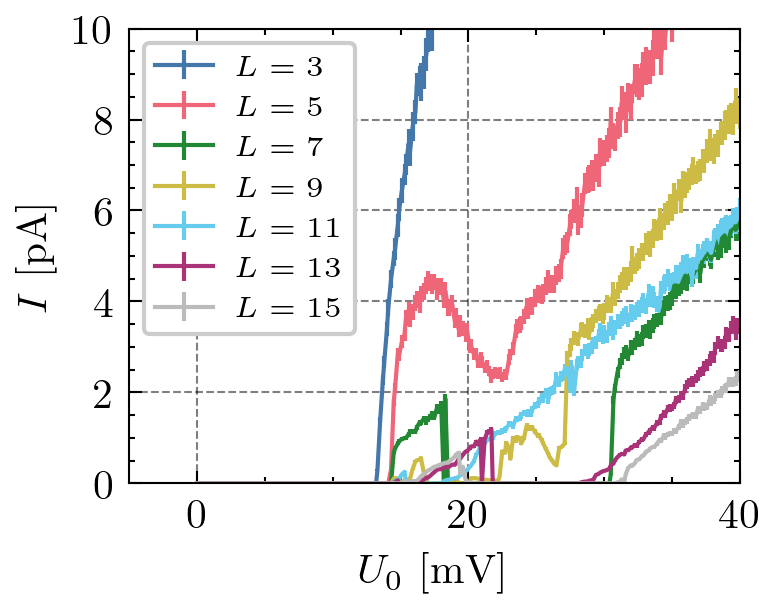

In [53]:
x   = np.round(np.linspace(0, V_INPUT_MAX, N_INPUTS),4)
pos = 1
i   = 0

fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
_       = fig.set_size_inches(w * scale, h * scale)

for L in L_VALS:
    df  = pd.read_csv(f"{PATH}Nx={L}_Ny={L}_Ne={N_E}_{pos}_{i}.csv")
    x   = df.loc[:,'E0'].values
    y   = df.loc[:,'Observable'].values
    y_e = df.loc[:,'Error'].values
    _   = ax.errorbar(x=x*1000, y=y*1e-6, yerr=y_e*1e-6, label=f'$L = {L}$')

_ = ax.set_xlabel("$U_0~[\mathrm{mV}]$")
_ = ax.set_ylabel("$I~[\mathrm{pA}]$")
_ = ax.set_xlim(-5,40)
_ = ax.set_ylim(0,10)
_ = ax.legend(fontsize='x-small')

### N_E = 2 unbiased

In [54]:
N_E         = 2
V_INPUT_MAX = 0.04
L_VALS      = [3,5,7,9,11,13,15]
N_INPUTS    = 250
PATH        = "/mnt/c/Users/jonas/Desktop/phd/data/1_funding_period/iv_curves/ctrl_sweep/"

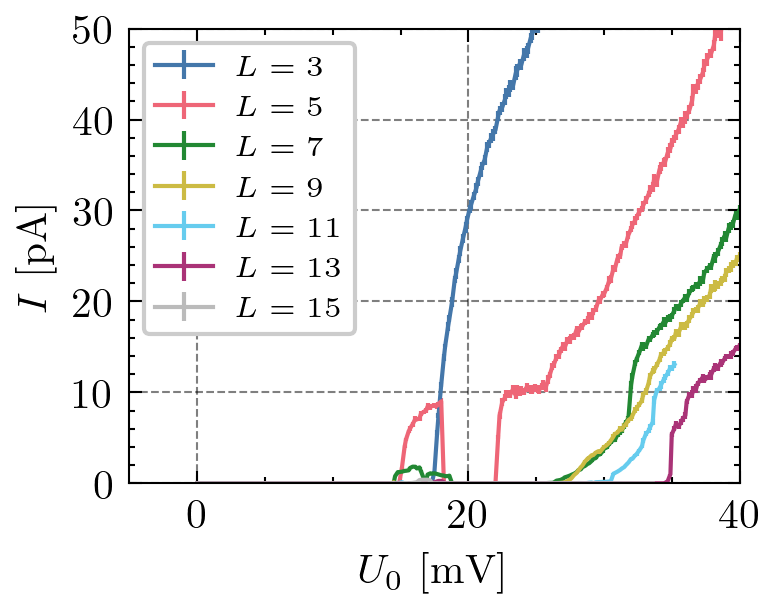

In [56]:
x   = np.round(np.linspace(0, V_INPUT_MAX, N_INPUTS),4)
pos = 1
i   = 0

fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
_       = fig.set_size_inches(w * scale, h * scale)

for L in L_VALS:
    df  = pd.read_csv(f"{PATH}Nx={L}_Ny={L}_Ne={N_E}_{pos}_{i}.csv")
    x   = df.loc[:,'E0'].values
    y   = df.loc[:,'Observable'].values
    y_e = df.loc[:,'Error'].values
    _   = ax.errorbar(x=x*1000, y=y*1e-6, yerr=y_e*1e-6, label=f'$L = {L}$')

_ = ax.set_xlabel("$U_0~[\mathrm{mV}]$")
_ = ax.set_ylabel("$I~[\mathrm{pA}]$")
_ = ax.set_xlim(-5,40)
_ = ax.set_ylim(0,50)
_ = ax.legend(fontsize='x-small')

In [ ]:
y_vals = {}
y_errs = {}
for pos in V_CTRL_POS:
    y_vals[pos] = {}
    y_errs[pos] = {}
    for i, V_ctrl in enumerate(V_CTRL_VALS):
        if i!=0:
            df = pd.read_csv(f"{PATH}Nx={L}_Ny={L}_Ne={N_E}_{pos}_{i}.csv")
            y_vals[pos][i] = df.loc[:,'Observable'].values
            y_errs[pos][i] = df.loc[:,'Error'].values

In [32]:
# Network
L           = 9
N_E         = 8
TOPOLOGY    = {"Nx": L,"Ny": L, "e_pos": [
    [(L-1)//2, 0],[0, 0],[L-1, 0],
    [0, (L-1)//2],[L-1, (L-1)//2],
    [0, L-1],[L-1, L-1],[(L-1)//2, L-1]],
    "electrode_type": ['constant']*N_E}


# Voltage
V_INPUT_MAX = 0.03
V_CTRL_VALS = [0.0,0.005,0.01,0.015,0.02,0.025,0.03]
V_CTRL_POS  = [1,3,5]
N_INPUTS    = 250

PATH = "/mnt/c/Users/jonas/Desktop/phd/data/1_funding_period/iv_curves/ctrl_sweep/"

In [33]:
x   = np.round(np.linspace(0, V_INPUT_MAX, N_INPUTS),4)
pos = 1
i   = 0
df  = pd.read_csv(f"{PATH}Nx={L}_Ny={L}_Ne={N_E}_{pos}_{i}.csv")
y   = df.loc[:,'Observable'].values
y_e = df.loc[:,'Error'].values

y_vals = {}
y_errs = {}
for pos in V_CTRL_POS:
    y_vals[pos] = {}
    y_errs[pos] = {}
    for i, V_ctrl in enumerate(V_CTRL_VALS):
        if i!=0:
            df = pd.read_csv(f"{PATH}Nx={L}_Ny={L}_Ne={N_E}_{pos}_{i}.csv")
            y_vals[pos][i] = df.loc[:,'Observable'].values
            y_errs[pos][i] = df.loc[:,'Error'].values

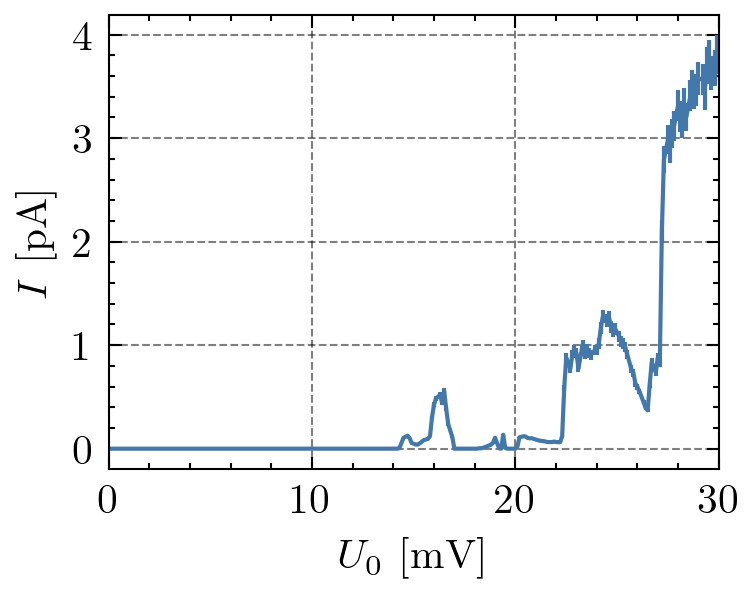

In [40]:
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
_       = fig.set_size_inches(w * scale, h * scale)

_ = ax.errorbar(x=x*1000, y=y*1e-6, yerr=y_e*1e-6)
_ = ax.set_xlabel("$U_0~[\mathrm{mV}]$")
_ = ax.set_ylabel("$I~[\mathrm{pA}]$")
_ = ax.set_xlim(0,30)

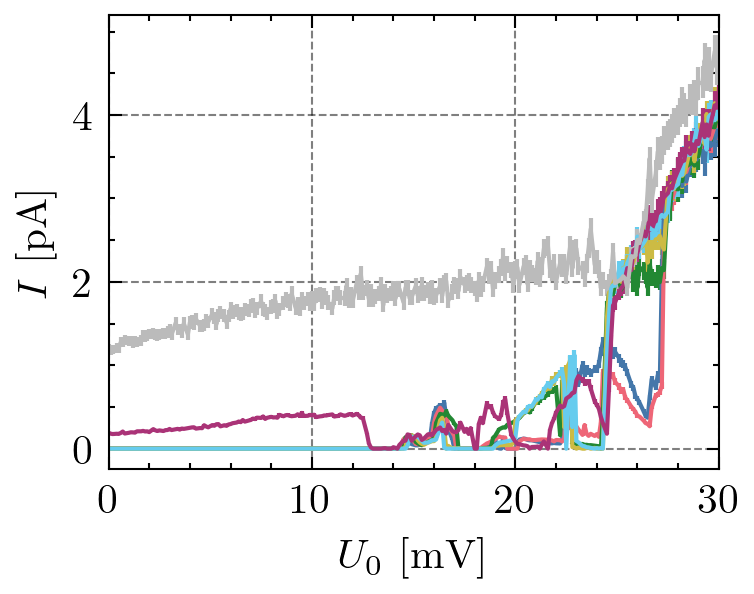

In [39]:
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
_       = fig.set_size_inches(w * scale, h * scale)

pos = 1
_   = ax.errorbar(x=x*1000, y=y*1e-6, yerr=y_e*1e-6)
for i in y_vals[pos].keys():
    _ = ax.errorbar(x=x*1000, y=y_vals[pos][i]*1e-6, yerr=y_errs[pos][i]*1e-6, label=f'$U_{pos} = {V_CTRL_VALS[i]*1000}~\mathrm{{mV}}$')
_   = ax.set_xlabel("$U_0~[\mathrm{mV}]$")
_   = ax.set_ylabel("$I~[\mathrm{pA}]$")
# _   = ax.legend(fontsize='small')
_   = ax.set_xlim(0,30)